# CNN Model

##Connecting Google Drive :

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing Libraries:

In [ ]:
! pip install mne

In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
import mne
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline

from mne import Epochs, events_from_annotations, pick_types
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.io import concatenate_raws, read_raw_edf
import librosa.display
from scipy.signal import spectrogram, hamming, stft
from tqdm import tqdm
import os
from mne.preprocessing import ICA
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


##Loading Dataset :

In [14]:
dataset='/content/drive/MyDrive/BCI Dataset/EEG-Image'

In [15]:
class_names_label=["H","MDD"]

In [16]:
datas = []
labels = []

IMAGE_SIZE = (255, 255)

output=[]

print("Loading {}".format(dataset))

for folder in os.listdir(dataset):
    for file in tqdm(os.listdir(os.path.join(dataset, folder))):

        path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
        image = cv2.imread(path)
        image = image[6:208,92:420]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE)

        datas.append(image)

        labels.append(folder)

datas = np.array(datas, dtype='float32')
labels = np.array(labels)

output.append((datas, labels))

Loading /content/drive/MyDrive/BCI Dataset/EEG-Image


100%|██████████| 30/30 [00:05<00:00,  5.51it/s]


## Model

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (255, 255, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(48, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 253, 253, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 126, 126, 16)      0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 126, 126, 16)      64        
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 126, 126, 16)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)       

In [19]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(datas, labels_encoded, test_size=0.2, random_state=42)

# Normalize pixel values to [0, 1]
# X_train /= 255.0
# X_test /= 255.0

In [20]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# earlystopping = EarlyStopping(monitor ="val_loss", mode ="min", patience = 2, restore_best_weights = True)callbacks =[earlystopping]

ephocs=5
mod = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=8, epochs=ephocs)

Epoch 1/5
6/6 [==============================] - 11s 2s/step - loss: 4.3334 - accuracy: 0.5000 - val_loss: 90.0491 - val_accuracy: 0.3636
Epoch 2/5
6/6 [==============================] - 4s 767ms/step - loss: 0.5090 - accuracy: 0.7955 - val_loss: 71.9849 - val_accuracy: 0.3636
Epoch 3/5
6/6 [==============================] - 3s 579ms/step - loss: 0.1913 - accuracy: 0.9091 - val_loss: 63.5228 - val_accuracy: 0.3636
Epoch 4/5
6/6 [==============================] - 4s 763ms/step - loss: 0.3014 - accuracy: 0.9318 - val_loss: 52.7260 - val_accuracy: 0.3636
Epoch 5/5
6/6 [==============================] - 5s 798ms/step - loss: 0.1801 - accuracy: 0.8636 - val_loss: 29.5165 - val_accuracy: 0.3636


In [22]:
# earlystopping = EarlyStopping(monitor ="val_loss", mode ="min", patience = 2, restore_best_weights = True)callbacks =[earlystopping]

ephocs=6
mod2 = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=8, epochs=ephocs)

Epoch 1/6
6/6 [==============================] - 11s 2s/step - loss: 0.1448 - accuracy: 0.9545 - val_loss: 17.4521 - val_accuracy: 0.3636
Epoch 2/6
6/6 [==============================] - 6s 1s/step - loss: 0.0164 - accuracy: 0.9773 - val_loss: 5.6762 - val_accuracy: 0.3636
Epoch 3/6
6/6 [==============================] - 4s 735ms/step - loss: 0.0608 - accuracy: 0.9773 - val_loss: 1.2756 - val_accuracy: 0.6364
Epoch 4/6
6/6 [==============================] - 6s 1s/step - loss: 1.3013e-04 - accuracy: 1.0000 - val_loss: 1.6967 - val_accuracy: 0.7273
Epoch 5/6
6/6 [==============================] - 15s 3s/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 2.0699 - val_accuracy: 0.6364
Epoch 6/6
6/6 [==============================] - 25s 3s/step - loss: 6.4975e-05 - accuracy: 1.0000 - val_loss: 2.2339 - val_accuracy: 0.7273


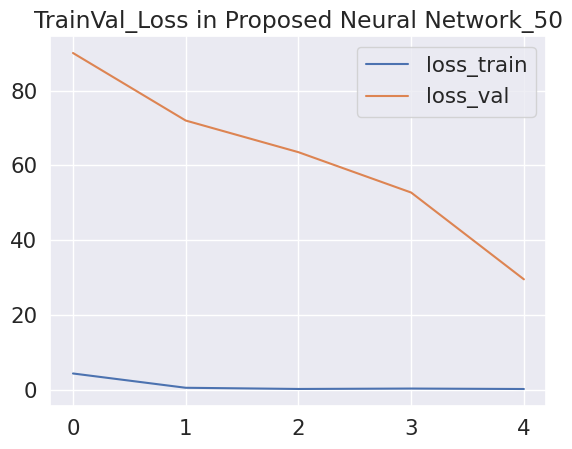

<Figure size 640x480 with 0 Axes>

In [23]:
plt.plot(mod.history['loss'], label='loss_train')
plt.plot(mod.history['val_loss'], label='loss_val')
plt.legend()
plt.title('TrainVal_Loss in Proposed Neural Network_50')
plt.show()
plt.savefig('LossVal_loss')

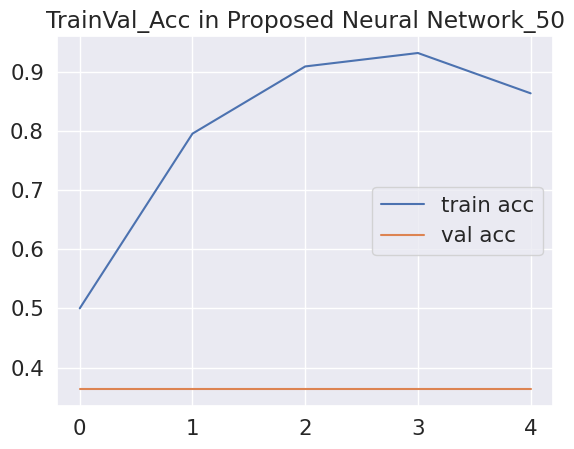

<Figure size 640x480 with 0 Axes>

In [24]:
plt.plot(mod.history['accuracy'], label='train acc')
plt.plot(mod.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('TrainVal_Acc in Proposed Neural Network_50')
plt.show()
plt.savefig('AccVal_acc')